In [17]:
import numpy as np
import pandas as pd

import scipy as sp
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# マハラノビス距離に基づく外れ値検出

 - データは$n$次元連続値ベクトルであるとする
 - これまで得られたデータ列を$x^{m} = x_{1}, \cdots , x_{m}$とし、$i$番目のデータは$x_{i} = {\left(x_{i,1}, \cdots, x_{i,n} \right)}^{T} $と記す
 - 平均ベクトル$\mu$,分散共分散行列$\Sigma$は以下で求められる
$$
\mu = \frac {1}{m}\sum _{i=1}^{m}{x_{i}}, \quad \Sigma = \frac {1}{m}\sum _{i=1}^{m}{ \left(x_{i} - \mu\right)\left(x_{i} - \mu\right)^{T} }
$$
 - そこで、$\theta$を閾値パラメータとして、新しいデータ$x$に対して、
 $$
 \left\{\left(x - \mu\right)^{T} {\Sigma}^{-1} \left(x - \mu\right)\right\}^{1/2} > \theta \quad (3.1)
 $$
 を満たすならば$x$は外れ値であると判定する。式(3.1)の左辺は$x$と$\mu$の**マハラノビス距離(Mahalanobis distance)**と呼ばれるもの
である。

以上の方法では、平均値と分散といった基本概念を通じて外れ値の概念を定式化している。しかし、平均値自身は外れ値の影響を大きく受け>るため、むしろ**中央値(median)**の考え方を利用して外れ値検出を行う方法も考えられる。

In [ ]:
def mahalanobis_dist(x):
    mu = np.mean(x, axis=1, skipna=True)
    cov = np.cov(x, rowvar=0, bias=1)
    inv_cov = np.linalg.inv(cov)
    mahal = np.dot()

In [1]:
HR_DATASET_PATH = 'datasets/HR_comma_sep.csv'
hr_df = pd.read_csv(HR_DATASET_PATH)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


(array([ 0.01465612,  0.01905295,  0.01465612,  0.05862447,  0.14069874,
         0.23742912,  0.29898481,  0.68004389,  1.23111393,  0.99954726,
         0.14509557,  0.03224346,  0.10552405,  0.21251371,  0.28432869,
         0.28432869,  0.14362996,  0.13776751,  0.12604262,  0.06741814]),
 array([ 1.03774975,  1.22881917,  1.41988859,  1.61095801,  1.80202744,
         1.99309686,  2.18416628,  2.3752357 ,  2.56630512,  2.75737455,
         2.94844397,  3.13951339,  3.33058281,  3.52165223,  3.71272166,
         3.90379108,  4.0948605 ,  4.28592992,  4.47699934,  4.66806877,
         4.85913819]),
 <a list of 20 Patch objects>)

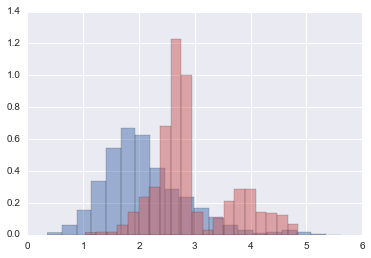

In [23]:
use_cols = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]

train_x = hr_df[hr_df.left == 0][use_cols]
test_x = hr_df[hr_df.left == 1][use_cols]

# 平均ベクトル、共分散行列、逆行列を求める
mu = np.mean(train_x.values, axis=0)
cov = np.cov(train_x.values, rowvar=0, bias=1)
inv_cov = np.linalg.inv(cov)


mahal_list = []
for x in train_x.values:
    diff = (x - mu)
    mahal = np.dot(diff.T, inv_cov).dot(diff)
    mahal_list.append(np.sqrt(mahal))

mahal_ser = Series(mahal_list)
plt.hist(mahal_ser, normed=True, alpha=0.5, bins=20)

mahal_list = []
for x in test_x.values:
    diff = (x - mu)
    mahal = np.dot(diff.T, inv_cov).dot(diff)
    mahal_list.append(np.sqrt(mahal))

mahal_ser = Series(mahal_list)
plt.hist(mahal_ser, normed=True, alpha=0.5, bins=20, color='indianred')

In [1]:
def local_norm(x):
    """
    標準化変量 = (x - 平均値)/標準偏差
    """
    means = np.mean(x, axis=1)
    std = np.std(x, axis=1)
    local_norm = (x - means[np.newaxis, :])/std[np.newaxis, :]
    return local_norm


def normal_pdf(x, mu, sigma):
    m = x.shape[0]
    epsi = 1.0e-6
    exp_part = np.exp(-0.5 * np.dot(np.dot((x-mu).T, np.linalg.pinv(sigma)), x-mu))
    norm_part = 1.0 / ((2.0*np.pi)**(m/2.0) * np.sqrt(np.linalg.det(sigma)))
    return norm_part * exp_part

In [4]:
def SDLE_algo(x, r, beta):
    pass


def SDEM_algo(x, r, alpha, k):
    pass